In [1]:
import os
import json

print(os.getcwd())

annotation_path="/home/kara9147/ML/caltech-pedestrian-dataset-converter/data/annotations.json"
annotations = json.load(open(annotation_path))
print(type(annotations))

#frame,xmin,xmax,ymin,ymax,class_id
#1478899046136829030.jpg,201,206,129,135,5

/home/kara9147/ML/ssd_keras_caltech
<class 'dict'>


In [2]:
set_name = "set05" 
#/home/kara9147/ML/caltech-pedestrian-dataset-converter/data/set00_V000_100.png
video_name = "V005"
print(type(annotations))
#data = annotations[set_name][video_name]
#for key, value in data.items():
#    print(key)
frames = annotations[set_name][video_name]['frames']
frameNo =[]
for key, value in frames.items():
    frameNo.append(key)
#print(sorted(frameNo))
print(len(frameNo))    

<class 'dict'>
1278


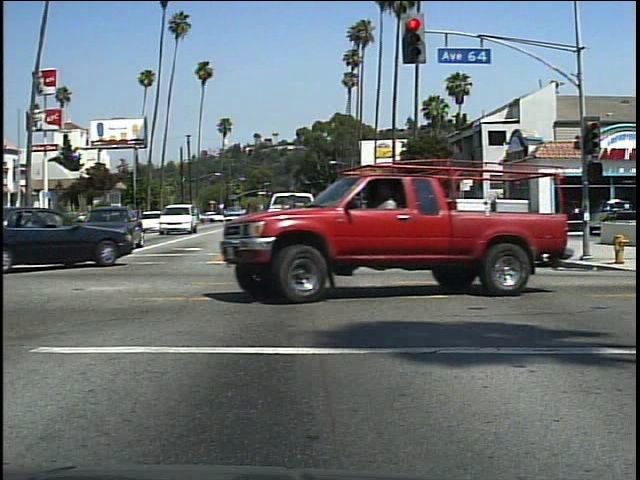

In [3]:
#import dbcollection as dbc
#https://dbcollection.readthedocs.io/en/latest/datasets/caltech_ped.html
imgNo = "846" #set00_V006_430.png set05_V005_846
from IPython.display import Image 
img_dir = '/home/kara9147/ML/caltech-pedestrian-dataset-converter/data/images/'
image_file = img_dir + set_name + '_' + video_name + '_' + imgNo + '.png'
image_file_bb = img_dir + set_name + '_' + video_name + '_' + imgNo + '_bb.png'
Image(filename = image_file)

In [5]:
print (frames[imgNo])

[{'id': 9, 'posv': [365.79468599033805, 177.67837034746, 34.66151428222099, 39.35314428737945], 'hide': 0, 'init': 1, 'pos': [360.31390764729946, 177.67837034746, 40.142292625259586, 114.111728890943], 'occl': 1, 'end': 876, 'lock': 0, 'str': 821, 'lbl': 'person'}, {'id': 7, 'posv': [496.2373260998827, 200.50800674696623, 1.0, 34.459921641780596], 'hide': 0, 'init': 1, 'pos': [475.7260703857688, 200.50800674696623, 24.189725852436766, 35.932691562242525], 'occl': 1, 'end': 1278, 'lock': 0, 'str': 228, 'lbl': 'person'}]


person
[360.31390764729946, 177.67837034746, 40.142292625259586, 114.111728890943]
person
[475.7260703857688, 200.50800674696623, 24.189725852436766, 35.932691562242525]


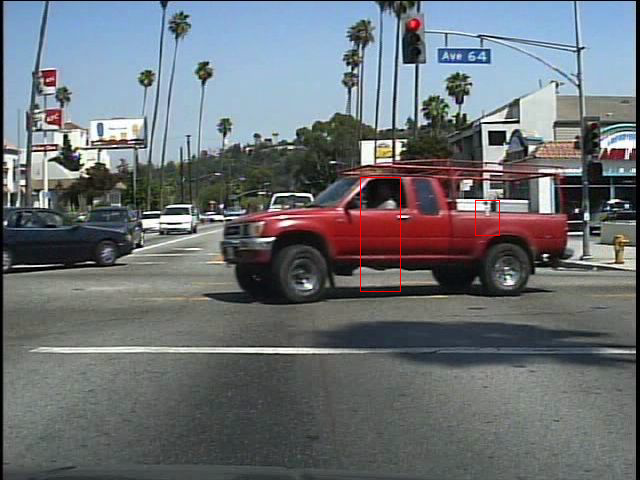

In [6]:
import cv2

frameDetails = frames[imgNo]

img = cv2.imread(image_file, 1)
for d in frameDetails:
    print(d['lbl'])
    pos = d['pos']
    print(pos)
# [l t w h]

    l = int(pos[0])
    t = int(pos[1])
    w = int(pos[2])
    h = int(pos[3])
    cv2.rectangle(img, (l, t), (l + w, t + h), (0, 0, 255), 1)
cv2.imwrite(image_file_bb, img)

Image(filename = image_file_bb)


In [46]:
videos_name = ["V000","V001", "V002", "V003", "V004", "V005", "V006", "V007", "V008", "V009", "V010", "V011", "V012", "V013", "V014"]
#videos_name = ["V000"]
class_id = {"person":1, "people":2, "person-fa":3, "person?":4}
header = ['frame', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id']

set_vid = [('set00',14), ('set01',5), ('set02',11), ('set03',12), ('set04',11), ('set05',12)]
#set_vid = [('set00',14)]

row = []
rows = []

#(width, height)(640, 480)

for s in set_vid: # For each Set
    print (s[0])
    for n in range(s[1] + 1): # For each Videos in the Set
        print(videos_name[n])
        
        set_name = s[0]
        video_name = videos_name[n]
        
        frames = annotations[set_name][video_name]['frames']
        print("No of Frames {}".format(len(frames)))
        #filenames =[]

        for key, value in frames.items(): # For each annotated Frame in the Video
            for details in (frames[key]): # For each bounding box in the Frame
                fileName = set_name + '_' + video_name + '_' + key + '.png'

                pos = details['pos']
                #print(pos)
                xmin = int(pos[0])
                ymin = int(pos[1])
                w = int(pos[2])
                h = int(pos[3])
                xmax = xmin + w
                ymax = ymin + h
                
                
                #assert xmax <=  660, "xmax can not exceed 640"
                #assert ymax <=  480, "ymax can not exceed 480"
                # Can not assert as for some of the bb's the positions are outside of the 640*480 co-ordinatres

                classid = class_id[details['lbl']]
                # frame,xmin,xmax,ymin,ymax,class_id: format from udacity_driving_datasets
                row.append(fileName)
                row.append(xmin)
                row.append(xmax)
                row.append(ymin)
                row.append(ymax)
                row.append(classid)

                #print(row)

                rows.append(row[:])
                row.clear()
        print("No of bb details in the video {}".format(len(rows)))
    print("No of  bb details in the set {}".format(len(rows)))
    #fileName = set_name + '_' + video_name + '_' + key + '.png'
    #filenames.append(fileName)
#print(len(filenames))



set00
V000
No of Frames 1588
No of bb details in the video 4519
V001
No of Frames 1785
No of bb details in the video 11822
V002
No of Frames 1018
No of bb details in the video 14156
V003
No of Frames 363
No of bb details in the video 14798
V004
No of Frames 1144
No of bb details in the video 16677
V005
No of Frames 75
No of bb details in the video 16774
V006
No of Frames 1898
No of bb details in the video 23977
V007
No of Frames 1880
No of bb details in the video 34426
V008
No of Frames 1496
No of bb details in the video 39404
V009
No of Frames 1567
No of bb details in the video 45876
V010
No of Frames 1702
No of bb details in the video 52932
V011
No of Frames 1546
No of bb details in the video 60064
V012
No of Frames 1539
No of bb details in the video 63686
V013
No of Frames 1657
No of bb details in the video 71434
V014
No of Frames 1911
No of bb details in the video 80465
No of  bb details in the set 80465
set01
V000
No of Frames 1499
No of bb details in the video 84953
V001
No of Fr

In [47]:
import csv

with open('labels_trainval.csv', 'w', newline='') as f:
    csv_writer = csv.DictWriter(f, fieldnames=header)
    csv_writer.writeheader()
    for r in rows:
        row = {'frame':r[0], 'xmin':r[1], 'xmax':r[2], 'ymin':r[3], 'ymax':r[4], 'class_id':r[5]}
        #print(row)
        csv_writer.writerow(row)
        